In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
df = pd.read_excel("../데이터자료/Join_data.xlsx", index_col = 0)    
df = df.set_index("DateTime")


# 대비 계산
df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['스왑포인트_1M'] = df['M1_스왑포인트']/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

df.rename({ '1Y_전일비_irs' : '대비_irs_1Y', '2Y_전일비_irs' :'대비_irs_2Y','3Y_전일비_irs':'대비_irs_3Y', '5Y_전일비_irs' : '대비_irs_5Y', '10Y_전일비_irs' : '대비_irs_10Y',
           '1Y_전일비_crs' :'대비_crs_1Y', '2Y_전일비_crs' :'대비_crs_2Y','3Y_전일비_crs' : '대비_crs_3Y', '5Y_전일비_crs' :'대비_crs_5Y', '10Y_전일비_crs' : '대비_crs_10Y','전일비_ndf' :'대비_ndf'}, axis=1, inplace=True)

# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y','대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex' ]]      


# 결측치 제거
df_1 = df_1.dropna()                           

In [3]:
# import matplotlib.pyplot as plt
# import seaborn as sns   
# import scipy as sp  
# from matplotlib import rc 
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# plt.figure(figsize=(20,20))

# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [4]:
df_1.columns

Index(['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
       '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
       '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y',
       '대비_ndf', '스왑포인트_1M', '전일종가_ex', '종가_ex'],
      dtype='object')

In [5]:
x = df_1[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
        '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
        '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
        '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M',
        '전일종가_ex']]
y = df_1["종가_ex"]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,대비_irs_1Y,대비_irs_2Y,대비_irs_3Y,대비_irs_5Y,대비_irs_10Y,대비_crs_1Y,대비_crs_2Y,대비_crs_3Y,대비_crs_5Y,대비_crs_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,대비_ndf,스왑포인트_1M,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-02,-0.847862,-1.216879,-0.935732,-1.045679,-1.009126,-0.205336,0.707523,0.905683,0.926547,0.826527,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.625160,0.294493,1.909409,-0.149841
2012-08-03,-0.847862,-0.731372,-0.562274,-0.628002,-0.403231,-0.205336,-0.364368,-0.463000,-1.872732,-3.115507,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.125723,0.687227,1.818881,-0.056232
2012-08-06,0.560374,0.482398,0.371369,0.416191,0.202663,-0.003044,-0.602566,-0.691113,-0.939639,-0.833277,0.563566,0.160261,0.000879,0.000209,0.107465,0.123996,-1.669177,1.818881,-0.000426
2012-08-07,0.278727,-0.003110,-0.002088,0.207352,0.404628,0.401540,0.350226,-0.006772,-1.639459,-1.663179,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.125723,0.076307,1.909409,-0.104837
2012-08-08,0.278727,0.482398,0.371369,0.416191,0.606592,0.199248,-0.007071,-0.006772,-0.473092,-0.833277,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.125723,0.207219,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-1.945141,-1.309189,-1.881032,-2.220914,-1.621379,-2.150854,-1.603569,-2.572552,-2.285605,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.625160,0.573770,-0.896960,3.207485
2022-07-26,-0.284568,-0.488618,-0.562274,-0.628002,-0.605196,0.199248,-0.721665,-0.691113,-0.473092,-0.418326,0.563566,-0.485246,-0.539435,-0.770625,0.107465,-0.000863,0.189764,-0.987488,3.220086
2022-07-27,-0.284568,-1.216879,-1.122460,-1.254517,-1.211091,0.199248,-0.245269,-0.234886,-0.239819,-0.210850,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,-0.125723,-0.098241,-0.851696,3.110275


[Text(0, 0.5, '대비_irs_1Y'),
 Text(0, 1.5, '대비_irs_2Y'),
 Text(0, 2.5, '대비_irs_3Y'),
 Text(0, 3.5, '대비_irs_5Y'),
 Text(0, 4.5, '대비_irs_10Y'),
 Text(0, 5.5, '대비_crs_1Y'),
 Text(0, 6.5, '대비_crs_2Y'),
 Text(0, 7.5, '대비_crs_3Y'),
 Text(0, 8.5, '대비_crs_5Y'),
 Text(0, 9.5, '대비_crs_10Y'),
 Text(0, 10.5, '대비_국고_1Y'),
 Text(0, 11.5, '대비_국고_3Y'),
 Text(0, 12.5, '대비_국고_5Y'),
 Text(0, 13.5, '대비_국고_10Y'),
 Text(0, 14.5, '대비_통안_1Y'),
 Text(0, 15.5, '대비_통안_2Y'),
 Text(0, 16.5, '대비_ndf'),
 Text(0, 17.5, '스왑포인트_1M'),
 Text(0, 18.5, '전일종가_ex')]

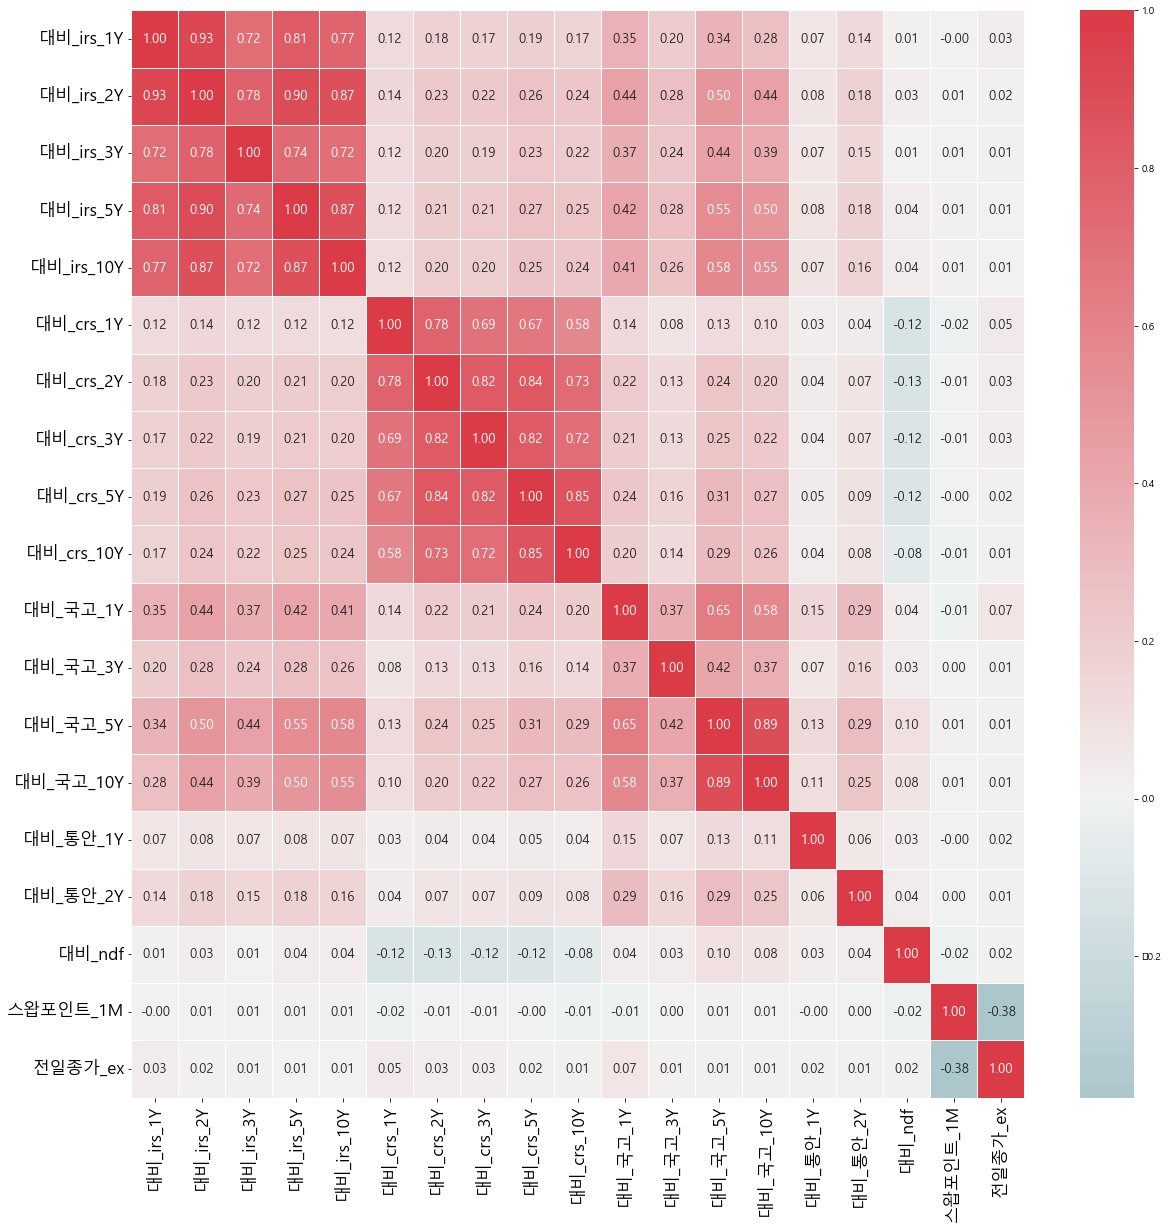

In [6]:
# 히트맵 그리기
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp 
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(210, 10, as_cmap=True)

res= sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0, annot_kws = {'size' : 13})

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 17)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 17)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.964149   대비_irs_1Y
1    19.507769   대비_irs_2Y
2     2.664108   대비_irs_3Y
3     6.468432   대비_irs_5Y
4     5.883580  대비_irs_10Y
5     2.651537   대비_crs_1Y
6     5.272451   대비_crs_2Y
7     3.830892   대비_crs_3Y
8     6.708564   대비_crs_5Y
9     3.722040  대비_crs_10Y
10    1.927034    대비_국고_1Y
11    1.253542    대비_국고_3Y
12    6.299576    대비_국고_5Y
13    5.056958   대비_국고_10Y
14    1.025512    대비_통안_1Y
15    1.115948    대비_통안_2Y
16    1.043675      대비_ndf
17    1.169209    스왑포인트_1M
18    1.182174     전일종가_ex


In [8]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:04   Log-Likelihood:                -7400.7
No. Observations:                2459   AIC:                         1.484e+04
Df Residuals:                    2439   BIC:                         1.496e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.1610      0.314      0.513      0.608      -0.454       0.776
대비_irs_2Y      0.4541      0.439      1.035      0.301      -0.407       1.315
대비_irs_3Y      0.0966      0.162      0.595      0.552      -0.221       0.415
대비_irs_5Y     -0.3067      0.253     -1.214      0.225      -0.802       0.189
대비_irs_10Y    -0.4535      0.241     -1.882      0.060      -0.926       0.019
대비_crs_1Y     -1.0267      0.162     -6.345      0.000      -1.344      -0.709
대비_crs_2Y     -0.0391      0.228     -0.171      0.864      -0.486       0.408
대비_crs_3Y     -0.3785      0.194     -1.946      0.052      -0.760       0.003
대비_crs_5Y      0.0693      0.257      0.269      0.788      -0.435       0.574
대비_crs_10Y     0.0142      0.192      0.074      0.941      -0.362       0.390
대비_국고_1Y       0.1678      0.138      1.217      0.224      -0.103       0.438
대비_국고_3Y      -0.2649      0.111     -2.382      0.017      -0.483      -0.047
대비_국고_5Y       0.5415      0.249      2.171      0.030       0.052       1.031
대비_국고_10Y     -0.1296      0.223     -0.580      0.562      -0.568       0.309
대비_통안_1Y      -0.0413      0.101     -0.410      0.682      -0.239       0.156
대비_통안_2Y       0.0531      0.105      0.506      0.613      -0.153       0.259
대비_ndf         2.3912      0.102     23.556      0.000       2.192       2.590
스왑포인트_1M      -0.1110      0.107     -1.033      0.302      -0.322       0.100
전일종가_ex       55.3084      0.108    511.945      0.000      55.097      55.520
==============================================================================
Omnibus:                       49.903   Durbin-Watson:                   2.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.849
Skew:                           0.046   Prob(JB):                     4.64e-23
Kurtosis:                       3.998   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
x_scaled.drop(['대비_irs_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.931366   대비_irs_1Y
1     2.553341   대비_irs_3Y
2     5.804019   대비_irs_5Y
3     5.226907  대비_irs_10Y
4     2.648706   대비_crs_1Y
5     5.260997   대비_crs_2Y
6     3.828392   대비_crs_3Y
7     6.703122   대비_crs_5Y
8     3.721897  대비_crs_10Y
9     1.915916    대비_국고_1Y
10    1.247534    대비_국고_3Y
11    6.213288    대비_국고_5Y
12    5.043142   대비_국고_10Y
13    1.025145    대비_통안_1Y
14    1.115259    대비_통안_2Y
15    1.043438      대비_ndf
16    1.169155    스왑포인트_1M
17    1.181377     전일종가_ex


In [10]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.729e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:04   Log-Likelihood:                -7401.2
No. Observations:                2459   AIC:                         1.484e+04
Df Residuals:                    2440   BIC:                         1.495e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4135      0.197      2.099      0.036       0.027       0.800
대비_irs_3Y      0.1308      0.159      0.824      0.410      -0.181       0.442
대비_irs_5Y     -0.2229      0.239     -0.931      0.352      -0.692       0.246
대비_irs_10Y    -0.3702      0.227     -1.630      0.103      -0.816       0.075
대비_crs_1Y     -1.0322      0.162     -6.383      0.000      -1.349      -0.715
대비_crs_2Y     -0.0281      0.228     -0.123      0.902      -0.475       0.419
대비_crs_3Y     -0.3837      0.194     -1.973      0.049      -0.765      -0.002
대비_crs_5Y      0.0769      0.257      0.299      0.765      -0.428       0.581
대비_crs_10Y     0.0154      0.192      0.081      0.936      -0.360       0.391
대비_국고_1Y       0.1787      0.138      1.299      0.194      -0.091       0.448
대비_국고_3Y      -0.2570      0.111     -2.315      0.021      -0.475      -0.039
대비_국고_5Y       0.5717      0.248      2.308      0.021       0.086       1.057
대비_국고_10Y     -0.1416      0.223     -0.635      0.526      -0.579       0.296
대비_통안_1Y      -0.0432      0.101     -0.430      0.667      -0.241       0.154
대비_통안_2Y       0.0558      0.105      0.532      0.595      -0.150       0.262
대비_ndf         2.3928      0.102     23.574      0.000       2.194       2.592
스왑포인트_1M      -0.1102      0.107     -1.026      0.305      -0.321       0.100
전일종가_ex       55.3055      0.108    512.084      0.000      55.094      55.517
==============================================================================
Omnibus:                       50.378   Durbin-Watson:                   2.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.924
Skew:                           0.050   Prob(JB):                     2.71e-23
Kurtosis:                       4.002   Cond. No.                         7.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
x_scaled.drop(['대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.930436   대비_irs_1Y
1     2.553279   대비_irs_3Y
2     5.804019   대비_irs_5Y
3     5.226284  대비_irs_10Y
4     2.648687   대비_crs_1Y
5     5.260930   대비_crs_2Y
6     3.828374   대비_crs_3Y
7     6.703122   대비_crs_5Y
8     3.721893  대비_crs_10Y
9     1.904571    대비_국고_1Y
10    1.247489    대비_국고_3Y
11    6.210367    대비_국고_5Y
12    5.043111   대비_국고_10Y
13    1.115161    대비_통안_2Y
14    1.043169      대비_ndf
15    1.169140    스왑포인트_1M
16    1.181296     전일종가_ex


In [12]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.831e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:05   Log-Likelihood:                -7401.3
No. Observations:                2459   AIC:                         1.484e+04
Df Residuals:                    2441   BIC:                         1.494e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4122      0.197      2.093      0.036       0.026       0.798
대비_irs_3Y      0.1311      0.159      0.826      0.409      -0.180       0.442
대비_irs_5Y     -0.2230      0.239     -0.932      0.352      -0.692       0.246
대비_irs_10Y    -0.3691      0.227     -1.625      0.104      -0.814       0.076
대비_crs_1Y     -1.0323      0.162     -6.385      0.000      -1.349      -0.715
대비_crs_2Y     -0.0284      0.228     -0.125      0.901      -0.475       0.418
대비_crs_3Y     -0.3835      0.194     -1.973      0.049      -0.765      -0.002
대비_crs_5Y      0.0769      0.257      0.299      0.765      -0.428       0.581
대비_crs_10Y     0.0155      0.192      0.081      0.935      -0.360       0.391
대비_국고_1Y       0.1741      0.137      1.270      0.204      -0.095       0.443
대비_국고_3Y      -0.2573      0.111     -2.318      0.021      -0.475      -0.040
대비_국고_5Y       0.5694      0.248      2.300      0.022       0.084       1.055
대비_국고_10Y     -0.1419      0.223     -0.636      0.525      -0.579       0.296
대비_통안_2Y       0.0554      0.105      0.528      0.598      -0.150       0.261
대비_ndf         2.3921      0.101     23.574      0.000       2.193       2.591
스왑포인트_1M      -0.1104      0.107     -1.027      0.304      -0.321       0.100
전일종가_ex       55.3052      0.108    512.183      0.000      55.093      55.517
==============================================================================
Omnibus:                       50.272   Durbin-Watson:                   2.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.643
Skew:                           0.050   Prob(JB):                     3.12e-23
Kurtosis:                       4.001   Cond. No.                         7.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
x_scaled.drop(['대비_irs_3Y', '대비_crs_5Y', '대비_통안_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.608611   대비_irs_1Y
1     5.676229   대비_irs_5Y
2     5.099788  대비_irs_10Y
3     2.646713   대비_crs_1Y
4     4.577107   대비_crs_2Y
5     3.455338   대비_crs_3Y
6     2.433840  대비_crs_10Y
7     1.869923    대비_국고_1Y
8     1.245917    대비_국고_3Y
9     6.159149    대비_국고_5Y
10    5.042444   대비_국고_10Y
11    1.040456      대비_ndf
12    1.169134    스왑포인트_1M
13    1.181006     전일종가_ex


In [14]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.225e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:06   Log-Likelihood:                -7401.9
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2444   BIC:                         1.492e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4580      0.189      2.428      0.015       0.088       0.828
대비_irs_5Y     -0.1905      0.237     -0.805      0.421      -0.654       0.273
대비_irs_10Y    -0.3436      0.224     -1.532      0.126      -0.783       0.096
대비_crs_1Y     -1.0359      0.162     -6.412      0.000      -1.353      -0.719
대비_crs_2Y      0.0001      0.212      0.001      1.000      -0.417       0.417
대비_crs_3Y     -0.3675      0.185     -1.991      0.047      -0.730      -0.006
대비_crs_10Y     0.0535      0.155      0.345      0.730      -0.250       0.357
대비_국고_1Y       0.1885      0.136      1.388      0.165      -0.078       0.455
대비_국고_3Y      -0.2533      0.111     -2.285      0.022      -0.471      -0.036
대비_국고_5Y       0.5876      0.246      2.384      0.017       0.104       1.071
대비_국고_10Y     -0.1435      0.223     -0.644      0.520      -0.581       0.294
대비_ndf         2.3897      0.101     23.591      0.000       2.191       2.588
스왑포인트_1M      -0.1102      0.107     -1.026      0.305      -0.321       0.100
전일종가_ex       55.3035      0.108    512.433      0.000      55.092      55.515
==============================================================================
Omnibus:                       50.347   Durbin-Watson:                   2.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.155
Skew:                           0.046   Prob(JB):                     2.42e-23
Kurtosis:                       4.004   Cond. No.                         6.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
x_scaled.drop(['대비_irs_5Y', '대비_crs_10Y', '대비_국고_1Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.833e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:06   Log-Likelihood:                -7403.2
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2447   BIC:                         1.490e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4295      0.163      2.638      0.008       0.110       0.749
대비_irs_10Y    -0.4694      0.187     -2.505      0.012      -0.837      -0.102
대비_crs_1Y     -1.0285      0.161     -6.371      0.000      -1.345      -0.712
대비_crs_2Y      0.0236      0.203      0.116      0.907      -0.374       0.422
대비_crs_3Y     -0.3515      0.176     -1.997      0.046      -0.697      -0.006
대비_국고_3Y      -0.2361      0.110     -2.149      0.032      -0.451      -0.021
대비_국고_5Y       0.6784      0.233      2.916      0.004       0.222       1.135
대비_국고_10Y     -0.1354      0.223     -0.608      0.544      -0.572       0.302
대비_ndf         2.3869      0.101     23.575      0.000       2.188       2.585
스왑포인트_1M      -0.1091      0.107     -1.017      0.309      -0.320       0.101
전일종가_ex       55.3153      0.108    514.221      0.000      55.104      55.526
==============================================================================
Omnibus:                       47.482   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           0.033   Prob(JB):                     1.12e-21
Kurtosis:                       3.968   Cond. No.                         5.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x_scaled.drop(['대비_crs_2Y', '대비_국고_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.465e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:06   Log-Likelihood:                -7403.4
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2449   BIC:                         1.488e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4464      0.160      2.782      0.005       0.132       0.761
대비_irs_10Y    -0.4901      0.184     -2.661      0.008      -0.851      -0.129
대비_crs_1Y     -1.0170      0.138     -7.355      0.000      -1.288      -0.746
대비_crs_3Y     -0.3402      0.142     -2.399      0.017      -0.618      -0.062
대비_국고_3Y      -0.2354      0.110     -2.144      0.032      -0.451      -0.020
대비_국고_5Y       0.5651      0.135      4.173      0.000       0.300       0.831
대비_ndf         2.3878      0.101     23.639      0.000       2.190       2.586
스왑포인트_1M      -0.1086      0.107     -1.012      0.312      -0.319       0.102
전일종가_ex       55.3147      0.108    514.407      0.000      55.104      55.526
==============================================================================
Omnibus:                       47.622   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.025
Skew:                           0.031   Prob(JB):                     8.54e-22
Kurtosis:                       3.971   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x_scaled.drop(['스왑포인트_1M'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.898e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:06   Log-Likelihood:                -7403.9
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2450   BIC:                         1.488e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4456      0.160      2.777      0.006       0.131       0.760
대비_irs_10Y    -0.4901      0.184     -2.662      0.008      -0.851      -0.129
대비_crs_1Y     -1.0171      0.138     -7.356      0.000      -1.288      -0.746
대비_crs_3Y     -0.3399      0.142     -2.396      0.017      -0.618      -0.062
대비_국고_3Y      -0.2357      0.110     -2.147      0.032      -0.451      -0.020
대비_국고_5Y       0.5638      0.135      4.164      0.000       0.298       0.829
대비_ndf         2.3891      0.101     23.653      0.000       2.191       2.587
전일종가_ex       55.3559      0.100    556.193      0.000      55.161      55.551
==============================================================================
Omnibus:                       47.349   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.265
Skew:                           0.030   Prob(JB):                     1.25e-21
Kurtosis:                       3.967   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x_scaled.drop(['대비_irs_10Y',  '대비_crs_3Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 5.173e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:06   Log-Likelihood:                -7410.4
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2452   BIC:                         1.488e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.1138      0.106      1.068      0.285      -0.095       0.323
대비_crs_1Y     -1.2371      0.102    -12.155      0.000      -1.437      -1.038
대비_국고_3Y      -0.2266      0.110     -2.061      0.039      -0.442      -0.011
대비_국고_5Y       0.3294      0.115      2.854      0.004       0.103       0.556
대비_ndf         2.4105      0.101     23.874      0.000       2.213       2.609
전일종가_ex       55.3679      0.100    555.444      0.000      55.172      55.563
==============================================================================
Omnibus:                       51.841   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.044
Skew:                           0.042   Prob(JB):                     2.10e-24
Kurtosis:                       4.028   Cond. No.                         1.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x_scaled.drop(['대비_irs_1Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 6.208e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:06   Log-Likelihood:                -7411.0
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2453   BIC:                         1.487e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_crs_1Y     -1.2282      0.101    -12.108      0.000      -1.427      -1.029
대비_국고_3Y      -0.2186      0.110     -1.993      0.046      -0.434      -0.004
대비_국고_5Y       0.3637      0.111      3.281      0.001       0.146       0.581
대비_ndf         2.4095      0.101     23.865      0.000       2.211       2.607
전일종가_ex       55.3709      0.100    555.681      0.000      55.176      55.566
==============================================================================
Omnibus:                       52.019   Durbin-Watson:                   2.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.709
Skew:                           0.040   Prob(JB):                     1.50e-24
Kurtosis:                       4.032   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df_scaled = pd.concat([x_scaled, y], axis=1)
df_scaled

,대비_crs_1Y,대비_국고_3Y,대비_국고_5Y,대비_ndf,전일종가_ex,종가_ex
DateTime,,,,,,
2012-08-02,-0.205336,-0.646622,-1.079749,0.294493,-0.149841,1131.7
2012-08-03,-0.205336,-0.323869,-1.890219,0.687227,-0.056232,1134.8
2012-08-06,-0.003044,0.160261,0.000879,-1.669177,-0.000426,1129.0
2012-08-07,0.401540,-0.001116,0.000879,0.076307,-0.104837,1128.8
2012-08-08,0.199248,-0.323869,-0.539435,0.207219,-0.108437,1128.3
...,...,...,...,...,...,...
2022-07-25,-1.621379,-0.969375,-1.890219,0.573770,3.207485,1313.7
2022-07-26,0.199248,-0.485246,-0.539435,0.189764,3.220086,1307.6
2022-07-27,0.199248,-0.485246,-1.349905,-0.098241,3.110275,1313.3


In [21]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

label_cols = ['종가_ex']
feature_cols = ['대비_crs_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']

In [22]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 1)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1555, 1, 5), (389, 1, 5))

In [23]:
x_train

array([[[-3.04383820e-03, -1.62492286e-01, -5.39434849e-01,
         -7.96434713e-01, -1.10213336e+00]],

       [[-3.04383820e-03, -1.11565786e-03,  8.78916251e-04,
         -4.03700831e-01, -5.80320252e-02]],

       [[-2.05335679e-01,  3.21637599e-01, -5.39434849e-01,
          6.87226620e-01,  6.67438386e-01]],

       ...,

       [[-1.01450304e+00, -1.11565786e-03,  8.78916251e-04,
          8.35592753e-01,  5.93631222e-01]],

       [[ 1.99248003e-01, -1.11565786e-03, -2.69277966e-01,
         -1.10189440e+00, -7.07895098e-01]],

       [[ 4.01539844e-01, -3.23868914e-01, -8.09591731e-01,
         -8.07863054e-02,  7.53846772e-01]]])

In [24]:
test_feature, test_label = make_dataset(test_feature, test_label, 1)
test_feature.shape, test_label.shape

((513, 1, 5), (513, 1))

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일(모델학습을 위한 학습과정 설정단계)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Test Accuracy: %.4f" % model.evaluate(x_valid, y_valid))     

Epoch 1/200
92/98 [===========================>..] - ETA: 0s - loss: 1266785.0000 - mae: 1124.3802
Epoch 1: val_loss improved from inf to 1269096.25000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 14s 96ms/step - loss: 1266280.6250 - mae: 1124.1530 - val_loss: 1269096.2500 - val_mae: 1125.4183
Epoch 2/200
97/98 [============================>.] - ETA: 0s - loss: 1265592.6250 - mae: 1123.8472
Epoch 2: val_loss improved from 1269096.25000 to 1268070.62500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 10s 101ms/step - loss: 1265540.1250 - mae: 1123.8257 - val_loss: 1268070.6250 - val_mae: 1124.9667
Epoch 3/200
91/98 [==========================>...] - ETA: 0s - loss: 1263997.1250 - mae: 1123.1508
Epoch 3: val_loss improved from 1268070.62500 to 1265823.25000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 8s 79ms/step

17/17 [==============================] - 0s 1ms/step


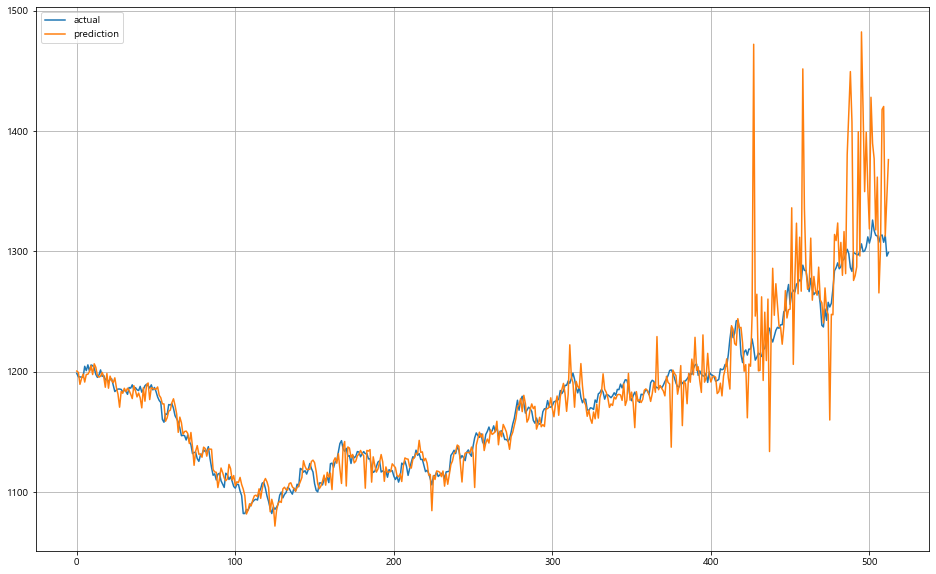

In [ ]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 10))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

df_ex = pd.read_excel('./xlsx/df_ex.xlsx')
df_ex= df_ex.set_index("DateTime")


df_ex_data=df_ex[['대비_crs_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']]
df_ex_target = df_ex["종가"]

In [ ]:

df_ex_data.feature = df_ex_data.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMadf_ex_dataScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(df_ex_data)
data_scaled = scaler.transform(df_ex_data)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_ex_data_scaled = pd.DataFrame(data = data_scaled, columns=df_ex_data.feature)

df_ex_data_scaled.index = df_ex_data.index # 인덱스가 달라서 똑같이 설정

# df_ex_data_scaled = df_ex_data_scaled.dropna()
df_ex_data_scaled

,대비_crs_1Y,대비_국고_3Y,대비_국고_5Y,대비_ndf,전일종가_ex
DateTime,,,,,
2012-08-03,-0.207333,-0.326540,-1.874896,0.184855,-0.076063
2012-08-06,-0.004827,0.156825,-0.004534,-0.451826,-0.021997
2012-08-07,0.400185,-0.004297,-0.004534,0.019790,-0.123154
2012-08-08,0.197679,-0.326540,-0.538923,0.055161,-0.126642
2012-08-09,1.817726,0.962434,1.331439,0.102323,-0.135362
...,...,...,...,...,...
2022-08-19,0.197679,1.123555,2.400217,0.564506,3.220249
2022-08-22,-0.409839,0.801312,1.064244,0.404157,3.310941
2022-08-23,-0.207333,0.156825,-0.806118,0.366427,3.553368


In [ ]:
X_train = df_ex_data_scaled[['대비_crs_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']][:2457]
X_test = df_ex_data_scaled[['대비_crs_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']][2457:]
y_train =  df_ex_target[:2457]
y_test =  df_ex_target[2457:]

In [ ]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))

MSE : 46.32380831917489, RMSE :  6.806, MAE: 6.806
Variance score :  0.796


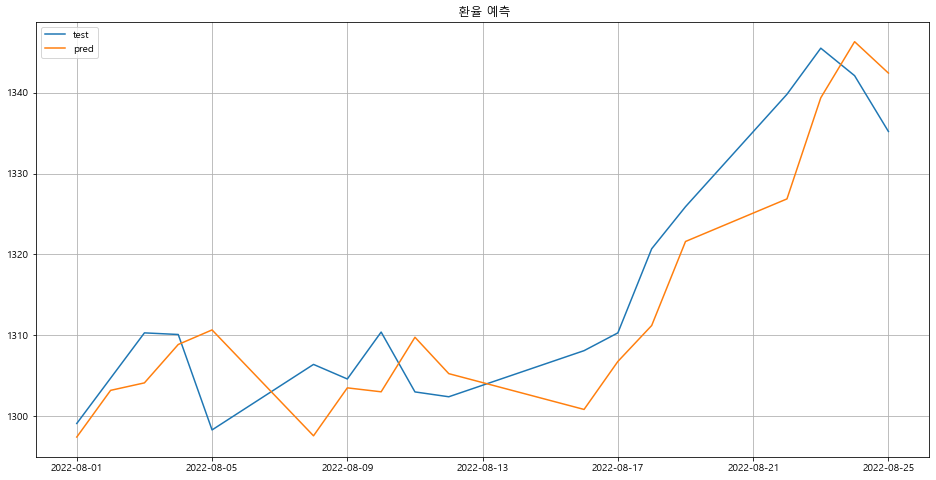

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title(' 환율 예측')
plt.plot(y_test.index, y_test.values, label="test")
plt.plot(y_test.index, y_pred, label="pred")
plt.legend(loc='best')
plt.grid()
plt.show()